#Código para plotar gráfico tensão deformação em un ensaio de tração


In [ ]:

import pandas as pd
import matplotlib.pylab as plt
import numpy as np

df = pd.read_csv(r"G6.csv", sep = ';', encoding='ISO-8859-1', usecols = [2,5])
df = df.iloc[1:]


df['Força'] = df['Força'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Deformação à tração (Deformação)'] = df['Deformação à tração (Deformação)'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['Força'] = pd.to_numeric(df['Força'], errors='coerce')
df['Deformação à tração (Deformação)'] = pd.to_numeric(df['Deformação à tração (Deformação)'], errors='coerce')


In [ ]:

Kforca = np.array(df['Força'])
defor = np.array(df['Deformação à tração (Deformação)'])


forca = Kforca * 1000 # deixa a forca em N ao inves de kN
tensao = forca / 0.000032578 #calcula a tensao sigma = F/A, A = (2.6 * 12.53 * 10^-6) m

E = (tensao[400] / (defor[400]*1E-2)) # modulo de elasticidade (rigidez)

#Máximos
defor_max = defor[7327]
tensao_max = tensao.max() # tensao maxima

#Ruptura
defor_rup = defor[-1]
tensao_rup = tensao[-1] # tensao de ruptura

#Tenacidade
area = np.trapz(tensao, defor/100)





Área sob o segmento de reta: 49698462.91976181


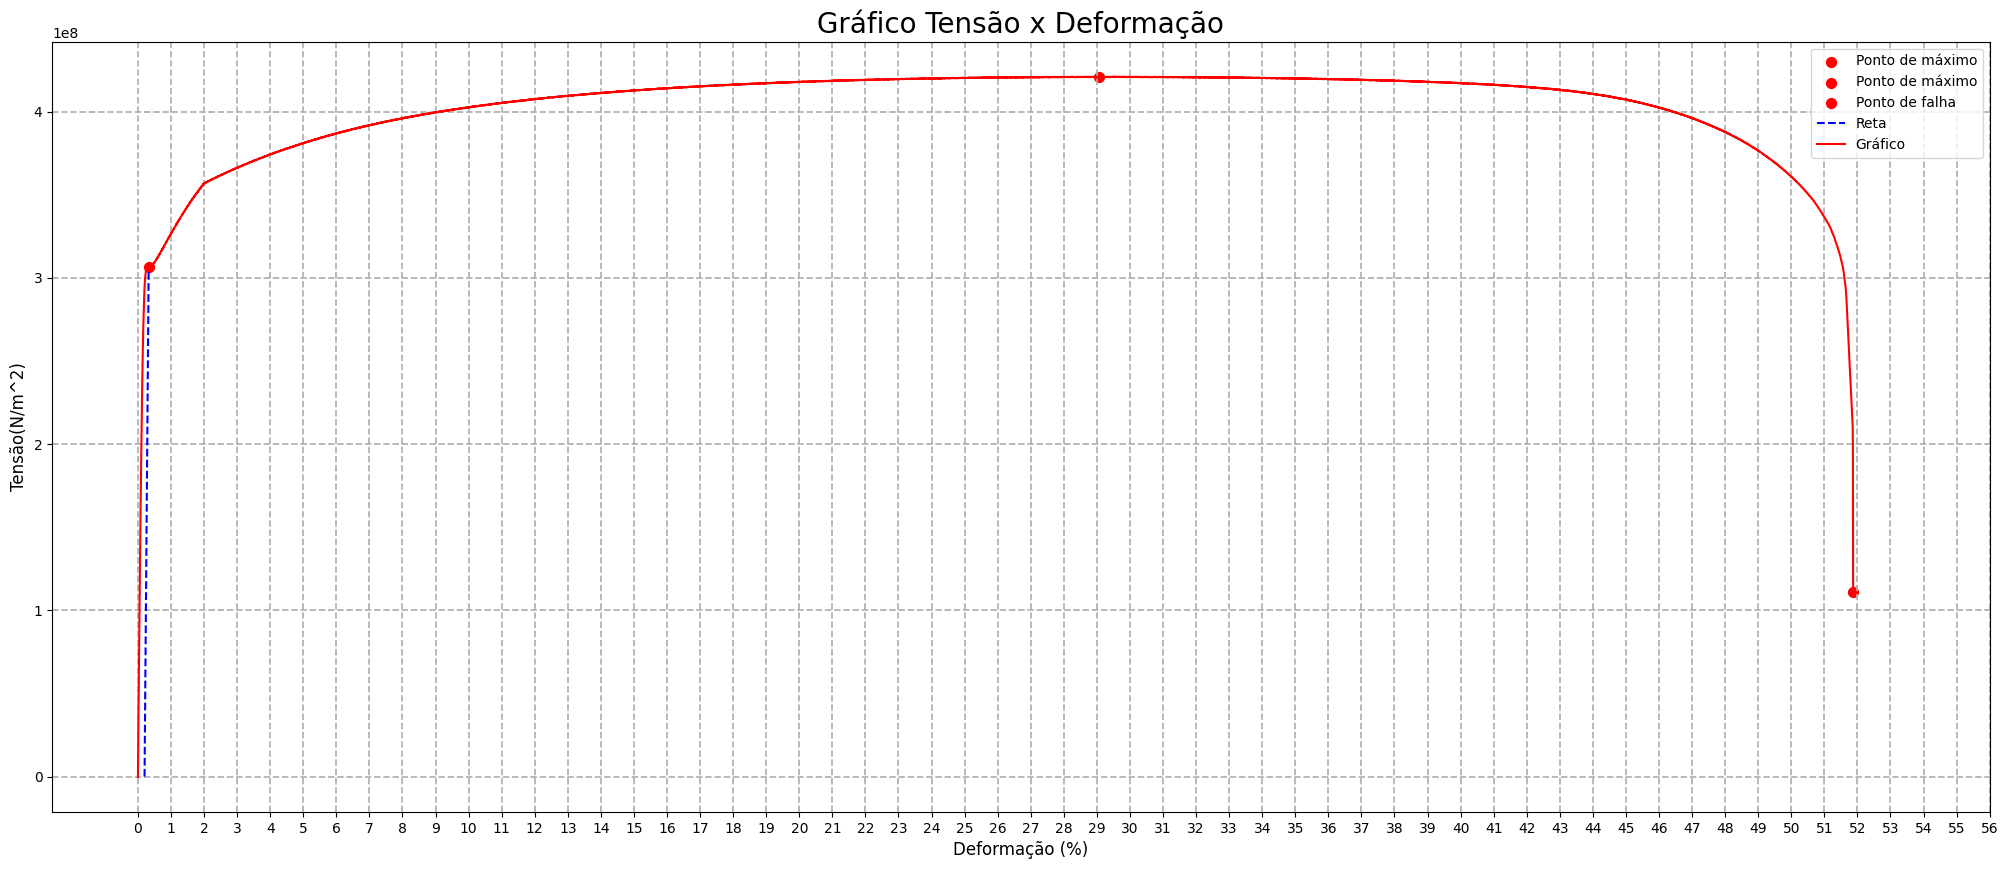

In [ ]:


defor_escoamento = defor[819]
tensao_escoamento = tensao[819]

#def o tamanho da figura
plt.figure(figsize=(25, 10))

plt.scatter(defor_escoamento, tensao_escoamento, color='red', s=50, label='Ponto de máximo')
#Máximo
plt.scatter(defor_max, tensao_max, color='red', s=50, label='Ponto de máximo')
#Falha
plt.scatter(defor_rup, tensao_rup, color='red', s=50, label='Ponto de falha')

#Reta
# Define a equação da reta
x = [0.2, defor[np.where(tensao >= tensao_escoamento)][0]]
y = [0, tensao_escoamento]  # Usando o valor de young que você calculou anteriormente

# Calcula a área sob o segmento de reta
indice_escoamento = np.where(tensao >= tensao_escoamento)[0][0]
area_escoamento = np.trapz(tensao[:indice_escoamento+1], defor[:indice_escoamento+1]/100)

print("Área sob o segmento de reta:", area_segmento)


# Plote a reta
plt.plot(x, y, "b--", label="Reta")
#Gráfico
plt.plot(defor, tensao, "r",label = "Gráfico")

#Gráfico

plt.xticks(np.arange(0, defor.max() + 5, 1))
plt.xlabel("Deformação (%)", fontsize = 12)
plt.ylabel("Tensão(N/m^2)", fontsize = 12)
plt.grid(True, linestyle='--', linewidth=1.25, alpha=1)
plt.title("Gráfico Tensão x Deformação", fontsize = 20)
plt.legend()
plt.show()




## Módulo de Young


In [ ]:
print(E*1E-9, "GPa")

204.05239878504048 GPa


## Tensão Máxima

In [ ]:
print(tensao_max*1E-6, "MPa")

420.99576401252375 MPa


## Tenacidade


In [ ]:
print(area*1E-6, "MJ/m^3 ou MPa")

208.49256776966052 MJ/m^3 ou MPa


## Resiliência

In [ ]:
print(area_escoamento*1E-6, "MPa")

0.7347907222665603 MPa


## Tensão de Escoamento

In [ ]:
print(tensao_escoamento*1E-6, "MPa")

306.3079378721837 MPa


## Tensão de Ruptura

In [ ]:
print(tensao_rup*1E-6, "MPa")

111.28982749094482 MPa
